In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
# 1. Load the data
cpasf_df = pd.read_csv('Cleaned_CPASF.csv')
cpmnt_df = pd.read_csv('Cleaned_CPMNT.csv')
scheme_df = pd.read_csv('Cleaned_Scheme_Details.csv')

In [22]:
# 2. Data preprocessing
def preprocess_data(data):
    # Convert categorical variables to numeric
    categorical_cols = ['Location', 'SKU', 'Division', 'Agent']
    for col in categorical_cols:
        if col in data.columns:
            data = pd.get_dummies(data, columns=[col])
    
    # Select numeric columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data = data[numeric_cols]
    
    # Handle missing values
    data = data.fillna(method='ffill')
    data = data.fillna(method='bfill')
    
    # Scale the features
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    return data_scaled, scaler

In [23]:
# 3. Merge datasets
data = pd.merge(cpasf_df, cpmnt_df, on='Date', how='inner')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Print available columns to verify
print("Available columns:", data.columns.tolist())

Available columns: ['Key_x', 'Locations_x', 'Division_x', 'SKU_x', 'Sales_x', 'OpeningStock_x', 'Receipts_x', 'Forecast_x', 'SellingPrice_x', 'NetStock_x', 'Lagged_Sales_x', 'Sales_MA_3_x', 'Sales_MA_6_x', 'Sales_MA_12_x', 'Agent_1_x', 'Agent_2_x', 'Agent_3_x', 'Agent_4_x', 'Agent_5_x', 'Location_AHMEDABAD_x', 'Location_AMBALA_x', 'Location_BANGALORE_x', 'Location_CALCUTTA_x', 'Location_CHANDIGARH_x', 'Location_CHENNAI_x', 'Location_DEHRADUN_x', 'Location_DELHI_x', 'Location_ERNAKULAM_x', 'Location_GHAZIABAD_x', 'Location_HYDERABAD_x', 'Location_KANPUR_x', 'Location_MUMBAI_x', 'Location_PARWANOO_x', 'Location_ZIRAKPUR_x', 'Key_y', 'Locations_y', 'Division_y', 'SKU_y', 'Sales_y', 'OpeningStock_y', 'Receipts_y', 'Forecast_y', 'SellingPrice_y', 'NetStock_y', 'Lagged_Sales_y', 'Sales_MA_3_y', 'Sales_MA_6_y', 'Sales_MA_12_y', 'Agent_1_y', 'Agent_2_y', 'Agent_3_y', 'Agent_4_y', 'Agent_5_y', 'Location_AHMEDABAD_y', 'Location_AMBALA_y', 'Location_BANGALORE_y', 'Location_CALCUTTA_y', 'Location_

In [24]:
# 4. Select features and target
features = ['Forecast_x', 'OpeningStock_x', 'Receipts_x', 'SellingPrice_x'] 
X = data[features]
y = data['Sales_x']

In [25]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# 6. Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 7. Build and train the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


C:\Users\sunil\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9794/9794 ━━━━━━━━━━━━━━━━━━━━ 10s 923us/step - loss: 1148339712.0000 - val_loss: 232675200.0000
Epoch 2/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 9s 946us/step - loss: 266011296.0000 - val_loss: 230047280.0000
Epoch 3/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 10s 969us/step - loss: 274737536.0000 - val_loss: 230320000.0000
Epoch 4/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 9s 928us/step - loss: 276278688.0000 - val_loss: 231526272.0000
Epoch 5/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 9s 901us/step - loss: 275584384.0000 - val_loss: 229052976.0000
Epoch 6/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 281002272.0000 - val_loss: 229549424.0000
Epoch 7/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 275585056.0000 - val_loss: 230982432.0000
Epoch 8/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 277471744.0000 - val_loss: 228396848.0000
Epoch 9/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 269740096.0000 - val_loss: 229634304.0000
Epoch 10/50
9794/9794 ━━━━━━━━━━━━━━━━━━━━ 9s 957us/step -

In [28]:
# 8. Evaluate the model
y_pred = model.predict(X_test_scaled)

3061/3061 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step


In [29]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Square Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 6970.753981206242
Mean Squared Error: 232620617.26191622
Root Mean Square Error: 15251.905364967231
R² Score: 0.888950357050422


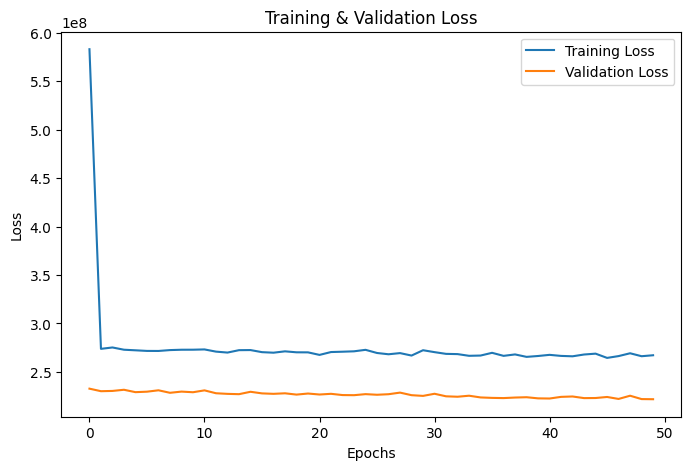

In [ ]:
# 9. Plot loss and accuracy graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [43]:
# 1. Fix the data splitting 
# Make sure the test dates align with actual data points
test_dates = data.index[len(X_train):len(X_train)+len(y_test)]

In [44]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Manual Forecast': X_test['Forecast_x'].values,
    'Model Prediction': y_pred.flatten()
}, index=test_dates)

In [45]:
# Set style and create figure 
plt.style.use('seaborn-v0_8')  # or use any other available style
plt.figure(figsize=(15, 8))

# Sort the data by date
comparison_df = comparison_df.sort_index()

<Figure size 1500x800 with 0 Axes>

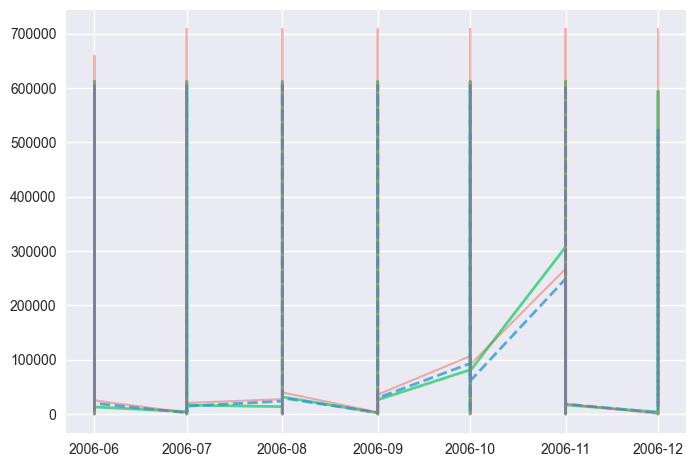

In [46]:
# Create the plot with enhanced styling
plt.plot(comparison_df.index, comparison_df['Actual Sales'], 
         color='#2ecc71', label='Actual Sales', 
         linewidth=2, alpha=0.8)

plt.plot(comparison_df.index, comparison_df['Model Prediction'], 
         color='#3498db', label='Model Prediction', 
         linewidth=2, linestyle='--', alpha=0.8)

plt.plot(comparison_df.index, comparison_df['Manual Forecast'], 
         color='#e74c3c', label='Manual Forecast', 
         linewidth=1.5, alpha=0.4)